## Rule based matching
- some entities are easier to match
- fixed format
    - time
    - date
    - telephone numbers
    
- extract using
    - morphological features
    - POS tags
    - regex
    
<br>
- Token-based matching
- PhraseMatcher
- EntityRuler
- Combining spaCy models and matchers

### Token based matching
- regex
- special pattern
- re library
- problems with token based math
    - difficult to read
    - difficult to debug
    - error prone with space, punctuation, and numerical characters

- <b>Spacy Matcher Class</b>


In [12]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_md')
doc = nlp('Good morning, I want to resverve a ticket.')

# matcher object should be initialized with nlp.vocab object
matcher = Matcher(nlp.vocab)
# define the pattern: list of dictionary
    # token whose lower text is good
    # token with lower text is morning
    # token that is punctuation
pattern = [{"LOWER": "good"}, 
           {"LOWER": "morning"}, 
           {"IS_PUNCT": True}]

matcher.add("morningGreeting", [pattern])
matches = matcher(doc)

for match_id, start, end in matches:
    m_span = doc[start:end]
    print(start, end, m_span.text)



0 3 Good morning,


- can add more patterns

In [16]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_md')

txt = '''Good morning, I want to reserve a ticket. 
I will then say good evening!'''

doc = nlp(txt)

matcher = Matcher(nlp.vocab)
pattern_1 = [
    {'LOWER': 'good'}, {'LOWER': 'morning'}, {'IS_PUNCT': True}
]
pattern_2 = [
    {'LOWER': 'good'}, {'LOWER': 'evening'}, {'IS_PUNCT': True}
]
matcher.add('morningGreeting', [pattern_1])
matcher.add('eveningGreeting', [pattern_2])

matches = matcher(doc)

for match_id, start, end in matches:
    pattern_name = nlp.vocab.strings[match_id]
    m_span = doc[start:end]
    print(f'{pattern_name}, {start}, {end}, {m_span.text}')

morningGreeting, 0, 3, Good morning,
eveningGreeting, 15, 18, good evening!


## Attributes
- can be used in the matcher
- 'matcher.add()
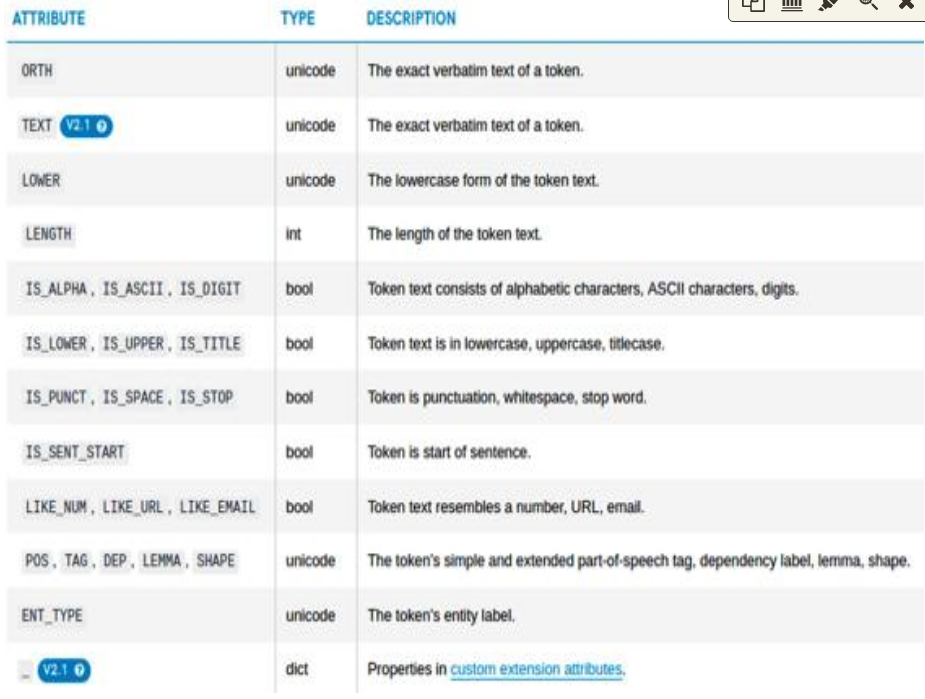

In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_md')
doc = nlp("Good morning, I'm here. I'll say good evening!!")

# Adding morning or evening in a single pattern
pattern = [{"LOWER": "good"},
            {"LOWER": {"IN": ["morning", "evening"]}},
            {"IS_PUNCT": True}]

matcher = Matcher(nlp.vocab)
matcher.add("greetings",  [pattern])
matches = matcher(doc)
for mid, start, end in matches:
     print(start, end, doc[start:end])

- comparision operation
- `pattern = [{"LENGTH": {">=" : 10}}]`

### Regex like operations
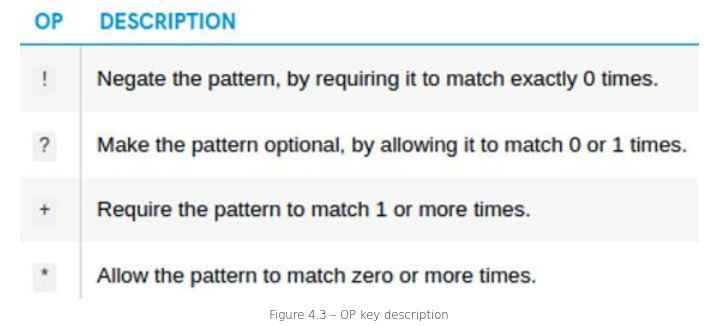

In [ ]:
pattern = [{"LOWER": "barack"},
            {"LOWER": "hussein", "OP": "?"},
            {"LOWER": "obama"}]

# the second name is optional
# because of the presence of the operaand ?

### Wild card pattern
- matches anything
```
doc = nlp("My name is Alice and his name was Elliot.")
pattern = [{"LOWER": "name"},{"LEMMA": "be"},{}]
matcher.add("pickName", [pattern])
for mid, start, end in matcher(doc):
     print(start, end, doc[start:end])

...

1 4 name is Alice
6 9 name was Elliot
```

### Match class + Regex support

In [ ]:
doc1 = nlp("I travelled by bus.")
doc2 = nlp("She traveled by bike.")
pattern = [{"POS": "PRON"},
           {"TEXT": {"REGEX": "[Tt]ravell?ed"}}] # use of regex
# T or t
# l or ll

for mid, start, end in matcher(doc1):
     print(start, end, doc1[start:end])

...

# 0 2 I traveled

for mid, start, end in matcher(doc2):
     print(start, end, doc2[start:end])

...

# 0 2 I travelled

-`pattern = [{"TAG": {"REGEX": "^V"}}]`
- a TAG starts with V
- online tool to check regex: https://regex101.com/